# BA Final Group Project 
### Group Member: Yunpeng Hou | Yihuan He | Tianzi Zheng | Ziqing Li | Lifu Sun | Jesus

### Project Structure
Data Cleaning: BA

Data Filtering:  FT & PT(Use these two dataframe to run models)

1. Descriptive Data Mining           
      1.1 Data Visulization                    
      1.2 K-Means                   
                       
                                                                                                                 
2. Predictive Data Mining

   2.1 Prediction for Numerical Data                   
      2.1.1 Linear Regression
         2.1.1 a) Full-Time DayDiff & Part-Time DayDiff
         2.1.1 b) Full-Time TotalWages & Part-Time TotalWages

      2.1.2 Regression Tree
         2.1.2 a) Fill-Time DayDiff & Part-Time DayDiff
         2.1.2 b) Fill-Time TotalWages & Part-Time TotalWages

   2.2 Prediction for Categorical Data  
      2.2.1 Logistic Regression
         2.2.1 a) Full-Time Education & Part-Time Education
         2.2.1 b) Full-Time Position & Part-Time Position

      2.2.2 K-Nearest Neighbors
         2.2.2 a) Full-Time Education & Part-Time Education
         2.2.2 b) Full-Time Position & Part-Time Position

      2.2.3 Classification Tree      
         2.2.3 a) Full-Time Education & Part-Time Education
         2.2.3 b) Full-Time Position & Part-Time Position

      2.2.4 Random Forest
         2.2.1 a) Full-Time Education & Part-Time Education
         2.2.1 b) Full-Time Position & Part-Time Position


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
BA = pd.read_csv('C:/Users/Yunpeng/Downloads/Python_Assignment/Employment_Now_Data.csv')

In [10]:
BA

,PID,AGE,GENDER,ZIP CODE,COUNTY,PROGRAM START DATE,POSITION,JOB START DATE,JOB TERMINATION DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year
0,PID02994,29,male,11692,Arverne,2015/6/24,Administrative,2015/9/3,NaN,15.60,30.0,HS Graduate,Q3-2015
1,PID00542,50,male,10456,Bronx,2015/7/4,Administrative,2015/8/3,NaN,8.75,30.0,HS Graduate,Q3-2015
2,PID03451,50,male,11420,South Ozone Park,2014/8/29,Administrative,2015/9/8,NaN,16.00,35.0,HS Graduate,Q3-2015
3,PID00543,50,male,10456,Bronx,2015/4/25,Administrative,2015/8/3,NaN,8.75,30.0,HS Graduate,Q3-2015
4,PID11335,40,male,11220,Brooklyn,2015/3/19,Administrative,2015/8/17,NaN,13.92,40.0,HS Graduate,Q3-2015
5,PID05307,26,male,11693,Far Rockaway,2015/4/5,Administrative,2015/9/16,NaN,16.50,35.0,HS Graduate,Q3-2015
6,PID05308,26,male,11693,Far Rockaway,2015/8/13,Administrative,2015/9/16,NaN,16.50,35.0,HS Graduate,Q3-2015
7,PID15814,33,male,11413,Springfield Gardens,2015/1/21,Administrative,2015/9/14,NaN,20.00,35.0,HS Graduate,Q3-2015
8,PID17406,22,female,11691,Far Rockaway,2014/4/28,Administrative,2014/10/2,2014/10/24,8.00,25.0,HS Graduate,Q4-2014
9,PID01003,31,female,11433,Jamaica,2014/1/8,Administrative,2014/5/8,NaN,12.00,40.0,HS Graduate,Q2-2014


In [11]:
BA.dtypes

PID                      object
AGE                       int64
GENDER                   object
ZIP CODE                  int64
COUNTY                   object
PROGRAM START DATE       object
POSITION                 object
JOB START DATE           object
JOB TERMINATION DATE     object
WAGE                    float64
HOURS PER WEEK          float64
EDUCATION                object
Quarter and Year         object
dtype: object

# Data Cleaning

In [12]:
BA.drop(["ZIP CODE","COUNTY","JOB TERMINATION DATE"],axis=1,inplace=True)
BA.head()
# There are too many Zip Code and County, so we just dropped 
# Because it may cause overfitted problem as we reviewed and assumed there are too many different values for each columns. 
# We will not analyze job termination date.

,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year
0,PID02994,29,male,2015/6/24,Administrative,2015/9/3,15.60,30.0,HS Graduate,Q3-2015
1,PID00542,50,male,2015/7/4,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015
2,PID03451,50,male,2014/8/29,Administrative,2015/9/8,16.00,35.0,HS Graduate,Q3-2015
3,PID00543,50,male,2015/4/25,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015
4,PID11335,40,male,2015/3/19,Administrative,2015/8/17,13.92,40.0,HS Graduate,Q3-2015


In [13]:
BA.dropna(subset=["AGE","GENDER","POSITION","EDUCATION","WAGE","HOURS PER WEEK"],inplace=True)
BA.head()

,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year
0,PID02994,29,male,2015/6/24,Administrative,2015/9/3,15.60,30.0,HS Graduate,Q3-2015
1,PID00542,50,male,2015/7/4,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015
2,PID03451,50,male,2014/8/29,Administrative,2015/9/8,16.00,35.0,HS Graduate,Q3-2015
3,PID00543,50,male,2015/4/25,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015
4,PID11335,40,male,2015/3/19,Administrative,2015/8/17,13.92,40.0,HS Graduate,Q3-2015


In [15]:
# Convert the data type of Date
BA["JOB_START_DATE"] = pd.to_datetime(BA["JOB START DATE"])
BA["PROGRAM START DATE"] = pd.to_datetime(BA["PROGRAM START DATE"])

In [16]:
BA["DayDiff"] = BA["JOB_START_DATE"] - BA["PROGRAM START DATE"]
BA.head()

,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year,JOB_START_DATE,DayDiff
0,PID02994,29,male,2015-06-24,Administrative,2015/9/3,15.60,30.0,HS Graduate,Q3-2015,2015-09-03,71 days
1,PID00542,50,male,2015-07-04,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,30 days
2,PID03451,50,male,2014-08-29,Administrative,2015/9/8,16.00,35.0,HS Graduate,Q3-2015,2015-09-08,375 days
3,PID00543,50,male,2015-04-25,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,100 days
4,PID11335,40,male,2015-03-19,Administrative,2015/8/17,13.92,40.0,HS Graduate,Q3-2015,2015-08-17,151 days


In [17]:
BA["DayDiff"] = BA['DayDiff'].dt.days
BA.head()
# DayDiff is how many days for candidates to get a job after submitting application.

,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year,JOB_START_DATE,DayDiff
0,PID02994,29,male,2015-06-24,Administrative,2015/9/3,15.60,30.0,HS Graduate,Q3-2015,2015-09-03,71
1,PID00542,50,male,2015-07-04,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,30
2,PID03451,50,male,2014-08-29,Administrative,2015/9/8,16.00,35.0,HS Graduate,Q3-2015,2015-09-08,375
3,PID00543,50,male,2015-04-25,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,100
4,PID11335,40,male,2015-03-19,Administrative,2015/8/17,13.92,40.0,HS Graduate,Q3-2015,2015-08-17,151


In [18]:
BA.dtypes

PID                           object
AGE                            int64
GENDER                        object
PROGRAM START DATE    datetime64[ns]
POSITION                      object
JOB START DATE                object
WAGE                         float64
HOURS PER WEEK               float64
EDUCATION                     object
Quarter and Year              object
JOB_START_DATE        datetime64[ns]
DayDiff                        int64
dtype: object

# Data Filtering

In [19]:
# According to hours per week, we divided dataframe into full-time dataframe and part-time dataframe.
# Total wages is calculated and added.  
FT = BA.loc[BA["HOURS PER WEEK"]>=40.0,:]
FT["TotalWages"] = FT["HOURS PER WEEK"] * FT["WAGE"]
FT.head()

D:\Python NYU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year,JOB_START_DATE,DayDiff,TotalWages
4,PID11335,40,male,2015-03-19,Administrative,2015/8/17,13.92,40.0,HS Graduate,Q3-2015,2015-08-17,151,556.8
9,PID01003,31,female,2014-01-08,Administrative,2014/5/8,12.00,40.0,HS Graduate,Q2-2014,2014-05-08,120,480.0
11,PID01004,31,female,2014-03-23,Administrative,2014/5/8,12.00,40.0,HS Graduate,Q2-2014,2014-05-08,46,480.0
19,PID19785,26,female,2015-06-15,Administrative,2015/7/17,10.00,40.0,HS Graduate,Q3-2015,2015-07-17,32,400.0
21,PID03444,37,female,2014-05-17,Administrative,2014/10/20,13.00,40.0,HS Graduate,Q4-2014,2014-10-20,156,520.0


In [20]:
# According to hours per week, we divided dataframe into full-time dataframe and part-time dataframe.
# Total wages is calculated and added.  
PT = BA.loc[BA["HOURS PER WEEK"]<40.0,:]
PT["TotalWages"] = PT["HOURS PER WEEK"] * PT["WAGE"]
PT.head()

D:\Python NYU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year,JOB_START_DATE,DayDiff,TotalWages
0,PID02994,29,male,2015-06-24,Administrative,2015/9/3,15.60,30.0,HS Graduate,Q3-2015,2015-09-03,71,468.0
1,PID00542,50,male,2015-07-04,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,30,262.5
2,PID03451,50,male,2014-08-29,Administrative,2015/9/8,16.00,35.0,HS Graduate,Q3-2015,2015-09-08,375,560.0
3,PID00543,50,male,2015-04-25,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,100,262.5
5,PID05307,26,male,2015-04-05,Administrative,2015/9/16,16.50,35.0,HS Graduate,Q3-2015,2015-09-16,164,577.5


# 1.Descriptive Data Mining

## 1.1 Data Visualization

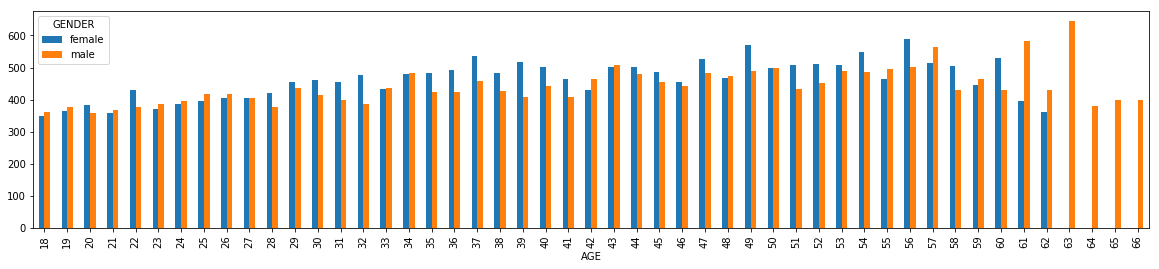

In [21]:
FT.pivot_table(values='TotalWages',index='AGE',columns='GENDER').plot.bar(figsize=(20,4))
#Full-time Total Wages per week

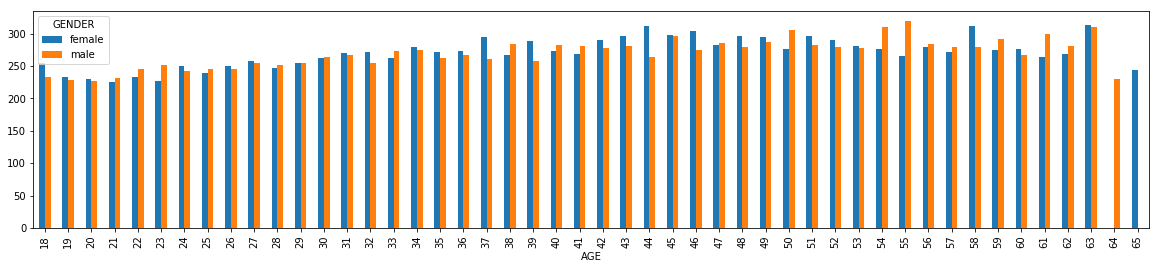

In [22]:
PT.pivot_table(values='TotalWages',index='AGE',columns='GENDER').plot.bar(figsize=(20,4))
# Part-time Total Wages per week

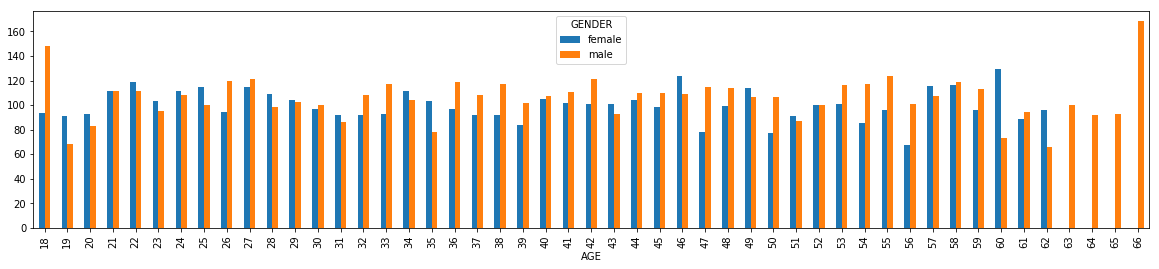

In [24]:
FT.pivot_table(values='DayDiff',index='AGE',columns='GENDER').plot.bar(figsize=(20,4))
#Full-time DayDiff

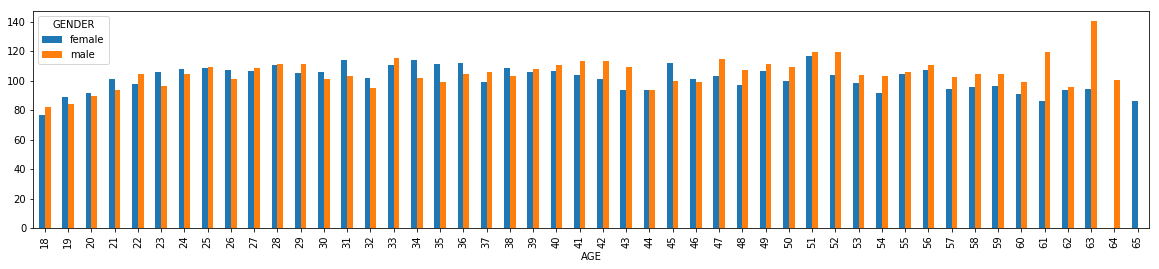

In [25]:
PT.pivot_table(values='DayDiff',index='AGE',columns='GENDER').plot.bar(figsize=(20,4))
# Part-time DayDiff

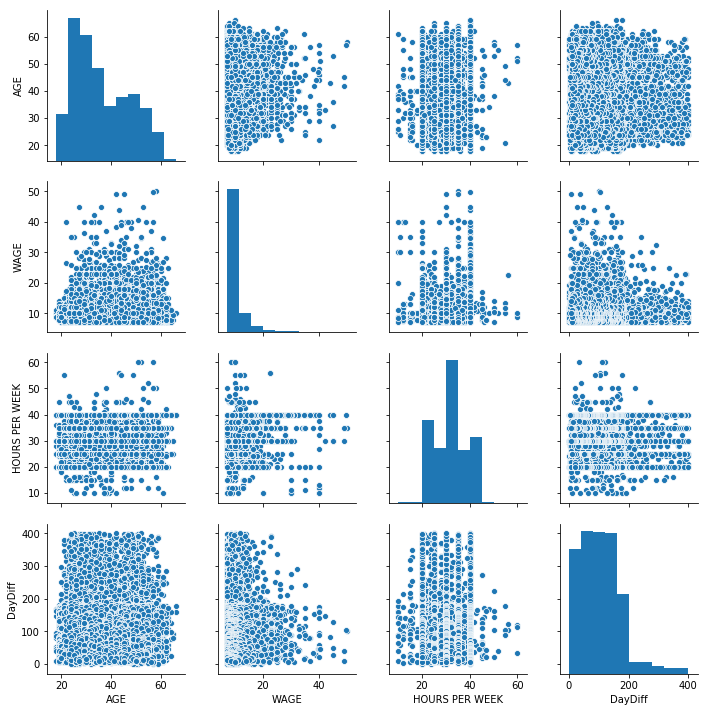

In [26]:
sns.pairplot(BA) 
# We can see the correltation between each variable. 
# It does not make sense as most of them are categorical data

## 1.2 K-Means

In [27]:
from sklearn.cluster import KMeans

In [28]:
X = PT[["WAGE","HOURS PER WEEK"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_
# We can determine it belongs to which group

array([2, 0, 2, ..., 1, 2, 0])

In [30]:
y_kmeans = kmeans.predict([[15.8, 20], [20, 40]])
y_kmeans
# We can predict it belongs to which group

array([1, 2])

In [31]:
kmeans.cluster_centers_

array([[ 8.99078275, 31.25124175],
       [ 9.0519841 , 22.09444444],
       [17.55978031, 31.40489914]])

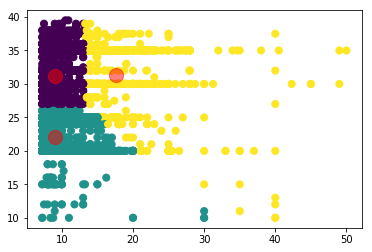

In [32]:
x = np.array(X)
y_kmeans = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### In overall, K-means does not help us to do predictive data mining. Because we already have columns to seperate these data as different independent variables, we just show what we did. 



In [55]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 2. Predictive Data Mining

## 2.1 Prediction for Numerical Data

### 2.1.1 Linear Regression

#### 2.1.1 a) Full-Time DayDiff & Part-Time DayDiff

In [40]:
FT.head()

,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year,JOB_START_DATE,DayDiff,TotalWages
4,PID11335,40,male,2015-03-19,Administrative,2015/8/17,13.92,40.0,HS Graduate,Q3-2015,2015-08-17,151,556.8
9,PID01003,31,female,2014-01-08,Administrative,2014/5/8,12.00,40.0,HS Graduate,Q2-2014,2014-05-08,120,480.0
11,PID01004,31,female,2014-03-23,Administrative,2014/5/8,12.00,40.0,HS Graduate,Q2-2014,2014-05-08,46,480.0
19,PID19785,26,female,2015-06-15,Administrative,2015/7/17,10.00,40.0,HS Graduate,Q3-2015,2015-07-17,32,400.0
21,PID03444,37,female,2014-05-17,Administrative,2014/10/20,13.00,40.0,HS Graduate,Q4-2014,2014-10-20,156,520.0


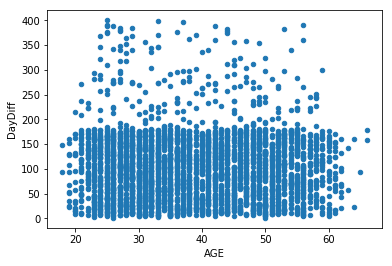

In [41]:
FT.plot.scatter(y='DayDiff',x='AGE')
# The relationship between age and daydiff is random

### There is no need to show scatterplot for categorical data

In [42]:
import statsmodels.formula.api as smf

In [43]:
reg_DayDiff = smf.ols('DayDiff~ AGE + GENDER + EDUCATION + POSITION ',data=FT).fit()
print(reg_DayDiff.summary())

                            OLS Regression Results                            
Dep. Variable:                DayDiff   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.024
Date:                Fri, 26 Apr 2019   Prob (F-statistic):              0.430
Time:                        16:02:12   Log-Likelihood:                -18429.
No. Observations:                3276   AIC:                         3.693e+04
Df Residuals:                    3241   BIC:                         3.714e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### There is no linear regression as most of variable of p-value is very high. 

In [44]:
PT.head()

,PID,AGE,GENDER,PROGRAM START DATE,POSITION,JOB START DATE,WAGE,HOURS PER WEEK,EDUCATION,Quarter and Year,JOB_START_DATE,DayDiff,TotalWages
0,PID02994,29,male,2015-06-24,Administrative,2015/9/3,15.60,30.0,HS Graduate,Q3-2015,2015-09-03,71,468.0
1,PID00542,50,male,2015-07-04,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,30,262.5
2,PID03451,50,male,2014-08-29,Administrative,2015/9/8,16.00,35.0,HS Graduate,Q3-2015,2015-09-08,375,560.0
3,PID00543,50,male,2015-04-25,Administrative,2015/8/3,8.75,30.0,HS Graduate,Q3-2015,2015-08-03,100,262.5
5,PID05307,26,male,2015-04-05,Administrative,2015/9/16,16.50,35.0,HS Graduate,Q3-2015,2015-09-16,164,577.5


In [45]:
reg_DayDiff = smf.ols('DayDiff~ AGE + GENDER + EDUCATION + POSITION ',data=PT).fit()
print(reg_DayDiff.summary())

                            OLS Regression Results                            
Dep. Variable:                DayDiff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.476
Date:                Fri, 26 Apr 2019   Prob (F-statistic):             0.0365
Time:                        16:02:13   Log-Likelihood:                -94031.
No. Observations:               16613   AIC:                         1.881e+05
Df Residuals:                   16578   BIC:                         1.884e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### There is no linear relationship as most of variable of p-value is very high. 

#### 2.1.1 b) Full-Time TotalWages & Part-Time TotalWages

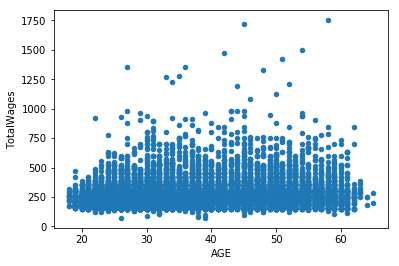

In [46]:
PT.plot.scatter(y='TotalWages',x='AGE')
# The relationship between age and Totalwages is random

In [48]:
reg_PTWages = smf.ols('TotalWages ~ AGE + GENDER + EDUCATION + POSITION ',data=PT).fit()
print(reg_PTWages.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalWages   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:02:27   Log-Likelihood:                -98238.
No. Observations:               16613   AIC:                         1.965e+05
Df Residuals:                   16578   BIC:                         1.968e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### Education[9],Education[11], Education[12],Position[Teacher] is not significant since p-value is very high.
### Therefore, we can get that                                                                                                                                         PTWages = 0.8990 * AGE + 3.0075 * Gender - b1 * Position** - b2 * Education** + 312.8936  
### Positon** and Education** are categorical data, so we need to match it with different coefficient. Also, for Education with 9,11,12 and Position  with Teacher, this regression has no effect.


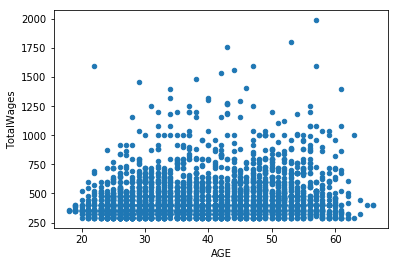

In [66]:
FT.plot.scatter(y='TotalWages',x='AGE')

In [67]:
reg_FTWages = smf.ols('TotalWages ~ AGE + GENDER + EDUCATION + POSITION ',data=FT).fit()
print(reg_FTWages.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalWages   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     52.86
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          2.76e-280
Time:                        18:47:55   Log-Likelihood:                -20907.
No. Observations:                3276   AIC:                         4.188e+04
Df Residuals:                    3241   BIC:                         4.210e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

### The P-value of Gender is very high, so we just remove this variable

In [68]:
reg_FTWages = smf.ols('TotalWages ~ AGE + EDUCATION + POSITION ',data=FT).fit()
print(reg_FTWages.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalWages   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     54.32
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          1.97e-280
Time:                        18:50:39   Log-Likelihood:                -20909.
No. Observations:                3276   AIC:                         4.189e+04
Df Residuals:                    3242   BIC:                         4.209e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

#### Education[11], Education[12], Education[HS Graduate], and Position[College] is not significant since p-value is very high.
#### Therefore, we can get that                                                                                                                                         PTWages = 2.0447* AGE - b1 * Position** - b2 * Education** + 519.8052 
#### Positon** and Education** are categorical data, so we need to match it with different coefficient. Also, for Education with 11,12, HS Graduate and Position with College, this regression has no effect.

# (3 of you please start from here)

from sklearn.model_selection import train_test_split
Reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=9)

Reg.fit(X_train,y_train)
Reg.predict(X_test)

Reg.score()


### 2.1.2 Regression Tree    * * * * * *  (3 of you please start from here)

#### 2.1.2 a) Fill-Time DayDiff & Part-Time DayDiff

#### 2.1.2 b) Fill-Time TotalWages & Part-Time TotalWages

Compare 2 scores:
DayDiff, no test score

Linear:
Full-Wage
Part-Wage

Tree:
Full_Wage
Part-wage

Full wage score compared
Part wage score compared


## 2.2 Prediction for Categorical Data  

### 2.2.1 Logistic Regression

#### 2.2.1 a) Full-Time Education & Part-Time Education

In [100]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder   # Use this one to transfer categorical data into dummy variable

In [101]:
Feature = FT[["POSITION","AGE","GENDER","TotalWages"]]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(Feature,FT["EDUCATION"], random_state=33)

In [103]:
len(X_train)

2457

In [104]:
len(y_train)

2457

In [105]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

#### 2.2.1 b) Full-Time Position & Part-Time Position

### 2.2.2 K-Nearest Neighbors

#### 2.2.2 a) Full-Time Education & Part-Time Education

#### 2.2.2 b) Full-Time Position & Part-Time Position

### 2.2.3 Classification Tree

#### 2.2.3 a) Part-Time Education

#### 2.2.3 b) Part-Time Position

#### 2.2.3 c) Part-Time & Full-Time

### 2.2.4 Random Forest

#### 2.2.4 a) Full-Time Education & Part-Time Education

#### 2.2.4 b) Full-Time Position & Part-Time Position

Compare 4 scores of each model